# Phân biệt

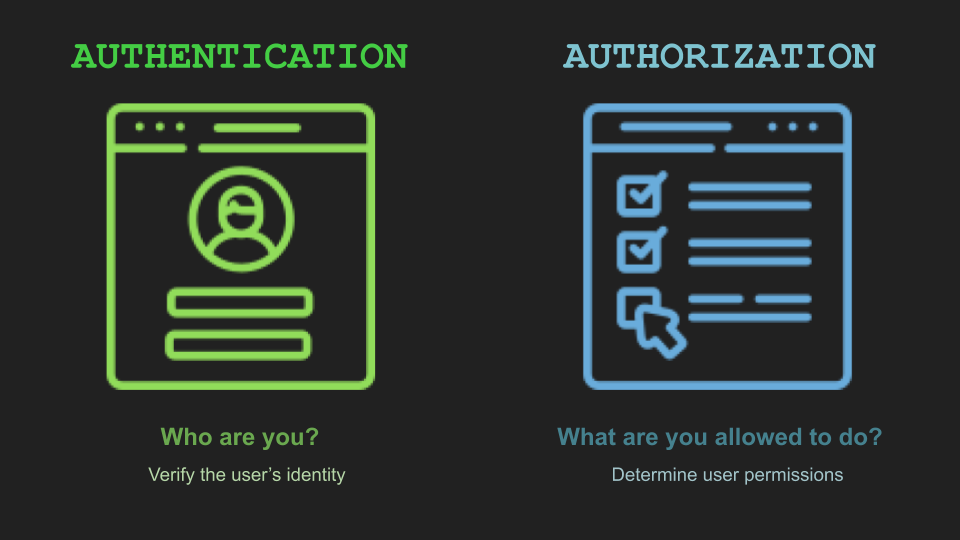

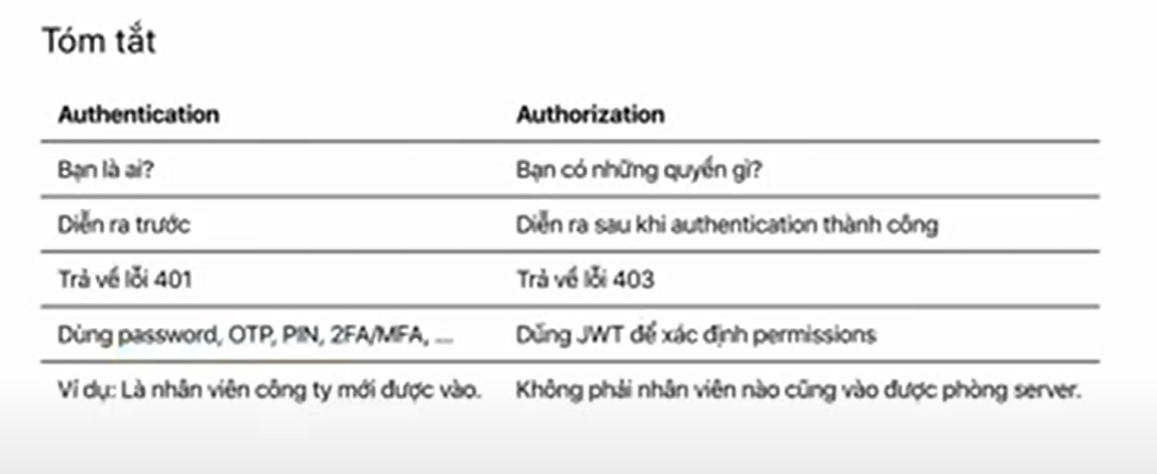

## Cách hoạt động


### I. Xác thực (Authentication) 

**1.Người dùng**
    <br>- Nhập tên người dùng và mật khẩu vào biểu mẫu đăng nhập.

**2.Hệ thống**
    <br>- Sever kiểm tra thông tin đăng nhập.
    <br>- Tạo và gửi token (JWT - đại diện cho user trong phiên đăng nhập) cho người dùng nếu thông tin đúng.
    
**3.Người Dùng:**
    <br>- FrontEnd nhận và lưu token.


### II. Phân quyền (Authorization)


**1. Người dùng:**
    <br>- Sau khi đăng nhập thành công. Người dùng truy cập vào các tài nguyên (token sẽ được kèm theo để xác thực user có quyền không).

**2. Hệ thống**
    <br>- Sever xác thực token.
    <br>- Kiểm tra quyền truy cập của người dùng đối với tài nguyên yêu cầu.

**3. Hệ thống**
    <br>- Nếu người dùng có quyền, trả về tài nguyên.
    - Nếu không, trả về thông báo lỗi.

## Kỹ Thuật

### Authentication

**1. Người dùng:**
>- Nhập user và password trên frontend.
>- FrontEnd gửi yêu cầu POST đến '/token' với thông tin đăng nhập (username và password).
>> - '/token' là đường dẫn tương đối. Được khai báo tokenUrl = "token".
>>> - Sử dụng đường dẫn tương đối khi tất cả các endpoint đều nằm cùng 1 sever. 
>>>> - Nếu API của bạn nằm ở https://example.com/, thì nó sẽ tham chiếu đến https://example.com/token
>>> - Nếu sever phức tạp thì dùng đường dẫn tuyệt đối (VD : tokenUrl="https://example.com/token").
>>> - '/token' là nơi frontend gửi thông tin đăng nhập (username & password), xử lý thông tin đăng nhập, tạo token và trả về cho frontend.

In [ ]:
POST /token
Content-Type: application/x-www-form-urlencoded

grant_type=password&username=<your_username>&password=<your_password>


**2. Hệ thống**
> - *Lấy thông tin* : sever nhận thông tin từ yêu cầu đăng nhập.
> - *Kiểm tra thông tin* : sever so sánh thông tin nhập vào vs thông tin lưu trữ trong cơ sở dữ liệu. (password do user nhập sẽ được mã hóa và so sánh với mật khẩu đã được mã hóa lưu trữ trong cơ sở dữ liệu.)
>> - *Nếu thông tin hợp lệ* : sever tạo token (JWT) và gửi về FrontEnd (thông qua đường dẫn '/token' ). FrontEnd sẽ lưu token trong local storage hoặc session storage

In [ ]:
{
  "access_token": "fake_token",
  "token_type": "bearer"
}

 >> - *Nếu Xác thực không thành công*: Trả về lỗi

In [ ]:
{
  "detail": "Invalid username or password"
}


### Authorization

**1. Người dùng**
> - *Truy cập tài nguyên*: khi người dùng nhấp vào giao diện để chuyển đến phần khác của web. Frontend gửi yêu cầu tới các endpoint đó (VD: /items/) kèm theo token trong header Authorization.


In [ ]:
GET /items/
Authorization: Bearer fake_token

**2. Hệ thống**
>  - Sever kiểm tra token: 
>>  - *Xác thực token*: Endpoint /items/ sử dụng Depends(oauth2_scheme) để lấy token trong (Authorization: Bearer 
fake_token) và xác thực nó.
>>  - *Phân Quyền*: Nếu token hợp lệ, server kiểm tra quyền của người dùng để đảm bảo họ có quyền truy cập tài nguyên yêu cầu.
>>> - Nếu token hợp lệ và quyền truy cập được xác nhận, server trả về dữ liệu yêu cầu.
>>> - Nếu không, server trả về lỗi (ví dụ: 403 Forbidden).